In [2]:
!unzip "E-Waste classification dataset.zip"


Archive:  E-Waste classification dataset.zip
  inflating: modified-dataset/test/Battery/battery_106.jpg  
  inflating: modified-dataset/test/Battery/battery_128.jpg  
  inflating: modified-dataset/test/Battery/battery_148.jpg  
  inflating: modified-dataset/test/Battery/battery_152.jpg  
  inflating: modified-dataset/test/Battery/battery_174.jpg  
  inflating: modified-dataset/test/Battery/battery_177.jpg  
  inflating: modified-dataset/test/Battery/battery_190.jpg  
  inflating: modified-dataset/test/Battery/battery_192.jpg  
  inflating: modified-dataset/test/Battery/battery_211.jpg  
  inflating: modified-dataset/test/Battery/battery_22.jpg  
  inflating: modified-dataset/test/Battery/battery_24.jpg  
  inflating: modified-dataset/test/Battery/battery_241.jpg  
  inflating: modified-dataset/test/Battery/battery_242.jpg  
  inflating: modified-dataset/test/Battery/battery_251.jpg  
  inflating: modified-dataset/test/Battery/battery_259.jpg  
  inflating: modified-dataset/test/Battery

In [3]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [5]:
base_dir = "/content/modified-dataset"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")


In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')


Found 2400 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 300 images belonging to 10 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])


In [9]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [10]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1494 - loss: 2.6904

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.1505 - loss: 2.6840 - val_accuracy: 0.4333 - val_loss: 1.6759
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.4718 - loss: 1.5203 - val_accuracy: 0.5600 - val_loss: 1.3103
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - accuracy: 0.6565 - loss: 1.0361 - val_accuracy: 0.6300 - val_loss: 1.1573
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.7671 - loss: 0.7111 - val_accuracy: 0.6467 - val_loss: 1.0218
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.8479 - loss: 0.4826 - val_accuracy: 0.6733 - val_loss: 1.0449
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - accuracy: 0.9116 - loss: 0.2877 - val_accuracy: 0.6967 - val_loss: 1.2350
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - accuracy: 0.9468 - loss: 0.1778 - val_accuracy: 0.6800 - val_loss: 1.3342
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.9656 - loss: 0.1264 - val_accuracy: 0.7067 - val_loss: 1.

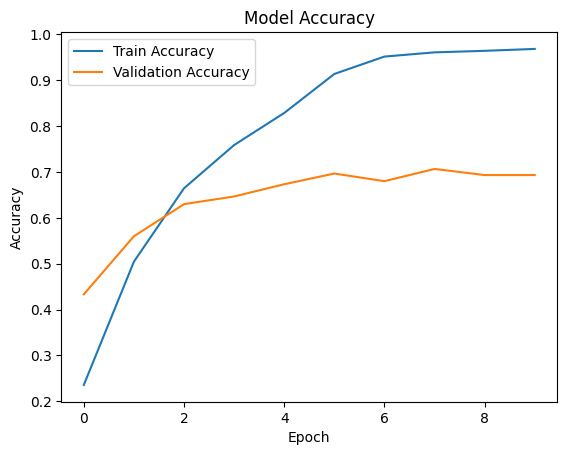

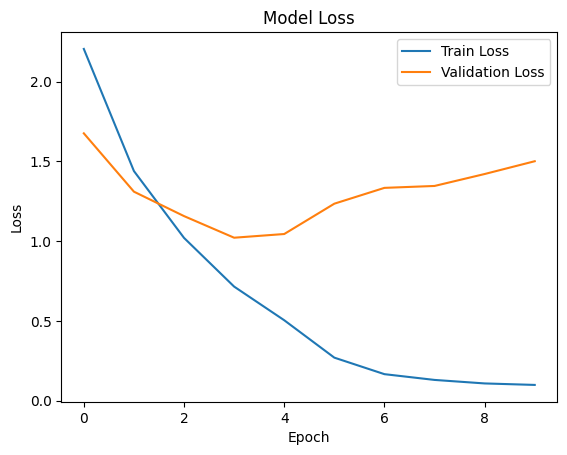

In [11]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
import tensorflow as tf

dataset_path = "/content/modified-dataset"  # your extracted folder path

train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(150, 150),
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(150, 150),
    batch_size=32
)

# Optional test_ds (we'll reuse val_ds instead if needed)
test_ds = val_ds


Found 3000 files belonging to 3 classes.
Using 2400 files for training.
Found 3000 files belonging to 3 classes.
Using 600 files for validation.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 950ms/step


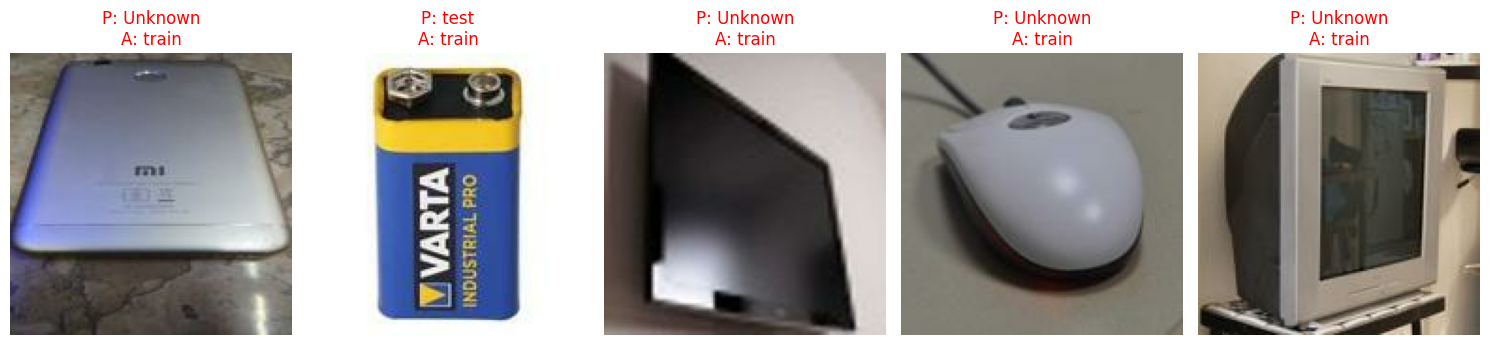

In [16]:
import matplotlib.pyplot as plt

# Get class names from test dataset
class_names = test_ds.class_names

# Take one batch of test images and labels
for images, labels in test_ds.take(1):
    # Get model predictions
    predictions = model.predict(images)
    predicted_classes = tf.argmax(predictions, axis=1)

    # Plot the first 5 images with actual vs predicted labels
    plt.figure(figsize=(15, 5))
    for i in range(5):
        ax = plt.subplot(1, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        actual = class_names[labels[i]]
        pred_idx = predicted_classes[i].numpy()

        # Prevent index out of range error
        if pred_idx < len(class_names):
            predicted = class_names[pred_idx]
        else:
            predicted = "Unknown"

        color = "green" if actual == predicted else "red"
        plt.title(f"P: {predicted}\nA: {actual}", color=color)
        plt.axis("off")

    plt.tight_layout()
    plt.show()


In [18]:
model.save("e_waste_classifier_model.keras")
import os
os.remove("e_waste_classifier_model.h5")
